# Making Maps


What goes into making a map?

* __Geometry__: Data structures to represent points, lines, and polygons, along with functions to manipulate them. Most packages are based on the open-source GEOS library.
* __Projections__: Functions to convert between different map projections. Most packages are based on the open-source PROJ.4 library.
* __Formats__: Functions to read/write shapefiles, geojson, and other formats. Most packages are based on the open-source GDAL/OGR library.
* __Display__: Functions to draw the map.
* __Searches__: Functions to search in various ways (geocode, reverse geocode, and so on).

The organization of Python's GIS (geographic information system) packages can be confusing, and some of the packages are difficult to install.

It's easiest to get started with one of the major mapping packages:

* basemap
* cartopy
* geopandas
* geoplot

## References

* Lawhead, J. _Learning Geospatial Analysis with Python_.
* [Basemap](http://matplotlib.org/basemap/)
    + [Basemap Tutorial](https://basemaptutorial.readthedocs.io/en/latest/)
    + [Mapping Global Earthquake Activity](http://introtopython.org/visualization_earthquakes.html)
    + [Creating Attractive and Informative Map Visualisations in Python with Basemap](http://www.datadependence.com/2016/06/creating-map-visualisations-in-python/)
* [CartoPy](http://scitools.org.uk/cartopy/docs/latest/)
* [GeoPandas](http://geopandas.org/)
    + [Automating GIS Processes](https://automating-gis-processes.github.io/), an open course from University of Helsinki
* [Geoplot](https://residentmario.github.io/geoplot/)

## Setup

In [1]:
# Make Jupyter to automatically display matplotlib plots.
%matplotlib inline
# Make plots larger.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 12)

The Yolo County health data is available [here](http://anson.ucdavis.edu/~nulle/yolo_food.feather).

In [2]:
import pandas as pd

food = pd.read_feather("data/yolo_food.feather")
food.head()

,Address,CityStateZip,FacilityId,FacilityName,LastScore,attachmentId,facility_index,programId,lat,lng,violation_count
0,507 L ST,DAVIS CA 95616,FA0001050,AGGIE LIQUOR,100.0,None,0,PR0000625,38.548803,-121.734964,1.0
1,1638 W CAPITOL AVE A,WEST SACRAMENTO CA 95691,FA0001104,ARIANA FOOD MARKET,100.0,47e30d7a-1ac8-4f4e-9698-a8470105abf2,1,PR0001009,38.580577,-121.529824,40.0
2,940 SACRAMENTO AVE,WEST SACRAMENTO CA 95605,FA0001394,ARTEAGA'S SUPERMARKET INC,100.0,97e57282-4d8f-489c-b824-a7f901131b7d,2,PR0000916,38.590215,-121.525425,36.0
3,966 SACRAMENTO Ave,WEST SACRAMENTO CA 95691,FA0001628,AY! JALISCO TAQUERIA #1,100.0,None,3,PR0022107,38.589293,-121.524593,15.0
4,220 3RD ST,DAVIS CA 95616,FA0001973,ALI BABA RESTAURANT,100.0,21baede1-18be-40df-a479-a86b00c2551f,4,PR0000674,38.543602,-121.746331,34.0


## GeoPandas

The GeoPandas package provides a Pandas-like interface for working with GIS data and making maps.

Shapely is a package that provides data structures for geometry. In order to use GeoPandas with our data, we need to convert the longitude and latitude to Shapely points.

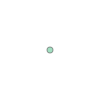

In [3]:
import shapely.geometry as geom

geom.Point(5, 10)

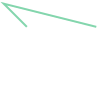

In [4]:
geom.LineString([(5, 10), (0, 15), (20, 10)])

In [5]:
import geopandas as gpd

lnglat = [geom.Point(lng, lat) for lng, lat in zip(food.lng, food.lat)]

food = gpd.GeoDataFrame(food, geometry = lnglat)
food.head()

,Address,CityStateZip,FacilityId,FacilityName,LastScore,attachmentId,facility_index,programId,lat,lng,violation_count,geometry
0,507 L ST,DAVIS CA 95616,FA0001050,AGGIE LIQUOR,100.0,None,0,PR0000625,38.548803,-121.734964,1.0,POINT (-121.7349636 38.54880290000001)
1,1638 W CAPITOL AVE A,WEST SACRAMENTO CA 95691,FA0001104,ARIANA FOOD MARKET,100.0,47e30d7a-1ac8-4f4e-9698-a8470105abf2,1,PR0001009,38.580577,-121.529824,40.0,POINT (-121.5298241 38.5805771)
2,940 SACRAMENTO AVE,WEST SACRAMENTO CA 95605,FA0001394,ARTEAGA'S SUPERMARKET INC,100.0,97e57282-4d8f-489c-b824-a7f901131b7d,2,PR0000916,38.590215,-121.525425,36.0,POINT (-121.525425 38.590215)
3,966 SACRAMENTO Ave,WEST SACRAMENTO CA 95691,FA0001628,AY! JALISCO TAQUERIA #1,100.0,None,3,PR0022107,38.589293,-121.524593,15.0,POINT (-121.5245931 38.5892931)
4,220 3RD ST,DAVIS CA 95616,FA0001973,ALI BABA RESTAURANT,100.0,21baede1-18be-40df-a479-a86b00c2551f,4,PR0000674,38.543602,-121.746331,34.0,POINT (-121.7463309 38.543602)


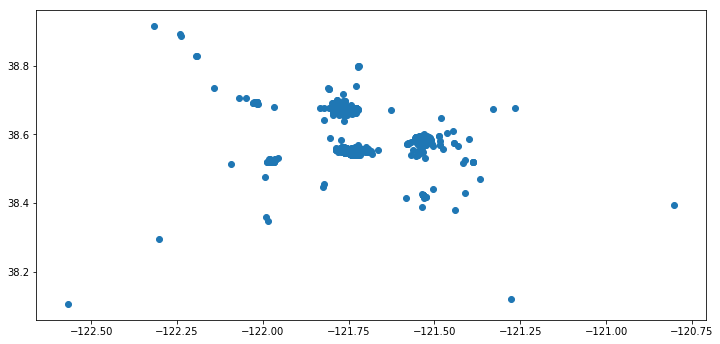

In [6]:
food.plot()

The map is hard to read unless we add some boundary lines.

Boundaries are usually stored as GeoJSON or Shapefile files. These files are often available for free online.

For instance, we can get [county](https://www.census.gov/geo/maps-data/data/cbf/cbf_counties.html), [place](https://www.census.gov/geo/maps-data/data/cbf/cbf_place.html), and [zip code](https://www.census.gov/geo/maps-data/data/cbf/cbf_zcta.html) shapefiles from the US Census.

In [56]:
zips = gpd.read_file("shapefiles/zips/cb_2016_us_zcta510_500k.shp")
zips.head()

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
0,21914,8600000US21914,21914,1924479,477175,"POLYGON ((-75.99444799999999 39.567742, -75.99..."
1,01001,8600000US01001,01001,29731610,2118827,"POLYGON ((-72.667677 42.045022, -72.657715 42...."
2,34736,8600000US34736,34736,322808220,78588518,"(POLYGON ((-81.806163 28.568643, -81.801577999..."
3,46151,8600000US46151,46151,530632048,9804480,"(POLYGON ((-86.398562 39.320829, -86.398125999..."
4,48039,8600000US48039,48039,59592687,4845242,"POLYGON ((-82.61060000000001 42.724669, -82.51..."


In [11]:
counties = gpd.read_file("shapefiles/counties/cb_2016_us_county_500k.shp")
counties.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,19,107,00465242,0500000US19107,19107,Keokuk,06,1500067253,1929323,"POLYGON ((-92.41199499999999 41.509548, -92.35..."
1,19,189,00465283,0500000US19189,19189,Winnebago,06,1037261946,3182052,"POLYGON ((-93.97076 43.499605, -93.88843009910..."
2,20,093,00485011,0500000US20093,20093,Kearny,06,2254696689,1133601,"POLYGON ((-101.54192 37.914575, -101.541863 37..."
3,20,123,00485026,0500000US20123,20123,Mitchell,06,1817632928,44979981,"POLYGON ((-98.49006799999999 39.241666, -98.49..."
4,20,187,00485055,0500000US20187,20187,Stanton,06,1762104518,178555,"POLYGON ((-102.041899 37.541186, -102.041894 3..."


In [28]:
counties = counties[counties.STATEFP == "06"]

keep = ["Yolo", "Lake", "Colusa", "Sutter", "Sacramento", "Solano", "Napa"]
counties = counties[counties.NAME.isin(keep)]

In [31]:
places = gpd.read_file("shapefiles/places/cb_2016_06_place_500k.shp")
places.head()

,STATEFP,PLACEFP,PLACENS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,06,43000,02410866,1600000US0643000,0643000,Long Beach,25,130317967,3004950,"(POLYGON ((-118.1289 33.758009, -118.127321 33..."
1,06,22804,02410455,1600000US0622804,0622804,Escondido,25,96015101,455887,"(POLYGON ((-117.023725 33.180605, -117.021986 ..."
2,06,33434,02410751,1600000US0633434,0633434,Hesperia,25,189317184,293823,"POLYGON ((-117.439881 34.354206, -117.437349 3..."
3,06,13882,02409474,1600000US0613882,0613882,Clayton,25,9946656,0,"POLYGON ((-121.956525 37.952527, -121.954416 3..."
4,06,53000,02411292,1600000US0653000,0653000,Oakland,25,144762241,56897826,"POLYGON ((-122.342253 37.805558, -122.33411840..."


(38.2, 39)

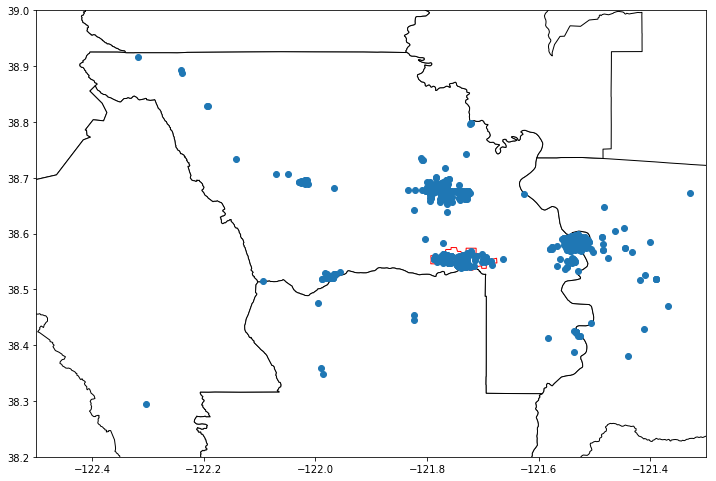

In [52]:
ax = counties.plot(color = "white", edgecolor = "black")
ax = places[places.NAME == "Davis"].plot(color = "white", edgecolor = "red", ax = ax)
food.plot(ax = ax)
ax.set_xlim([-122.5, -121.3])
ax.set_ylim([38.2, 39])

## GeoPlot

We can use the geoplot package to make nicer maps.

In [ ]:
import geoplot as gplt

ax = gplt.polyplot(counties)
gplt.pointplot(food, ax = ax)

In [ ]:
ax = gplt.polyplot(counties[counties.NAME == "Yolo"])
gplt.pointplot(food, ax = ax)

## Basemap

The basemap package provides GIS functions for matplotlib.

We'll use the [NOAA Significant Earthquake Database](https://www.ngdc.noaa.gov/nndc/struts/form?t=101650&s=1&d=1) in the examples below.

In [ ]:
df = pd.read_table("significant_quakes.tsv")
df.columns = df.columns.str.lower()
latlon = ["latitude", "longitude"]
df[latlon] = df[latlon].apply(lambda x: pd.to_numeric(x.str.strip()))
df.head()

In [ ]:
df.dtypes

In [ ]:
from mpl_toolkits.basemap import Basemap
import numpy as np

my_map = Basemap(projection='robin', lat_0=0, lon_0=-130, resolution='l', area_thresh=1000)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color="gray")
my_map.drawmapboundary()
my_map.drawmeridians(np.arange(0, 360, 30))
my_map.drawparallels(np.arange(-90, 90, 30))

x, y = my_map(-121.70, 38.54) # Davis, CA
my_map.plot(x, y, "ro")
my_map

In [ ]:
quake_map = Basemap(projection='robin', lat_0=0, lon_0=-130, resolution='l', area_thresh=1000)
 
quake_map.drawcoastlines()
quake_map.drawcountries()
quake_map.fillcontinents(color="gray")
quake_map.drawmapboundary()
quake_map.drawmeridians(np.arange(0, 360, 30))
quake_map.drawparallels(np.arange(-90, 90, 30))

x, y = quake_map(df.longitude.values, df.latitude.values)
quake_map.plot(x, y, "ro", markersize = 1)

In [ ]:
df.eq_primary.describe()

In [ ]:
quake_map = Basemap(projection='robin', lat_0=0, lon_0=-130, resolution='l', area_thresh=1000)
 
quake_map.drawcoastlines()
quake_map.drawcountries()
quake_map.fillcontinents(color="gray")
quake_map.drawmapboundary()
quake_map.drawmeridians(np.arange(0, 360, 30))
quake_map.drawparallels(np.arange(-90, 90, 30))

for lon, lat, mag in zip(df.longitude, df.latitude, df.eq_primary):
    x, y = quake_map(lon, lat)
    color = "r"
    if mag <= 5.7:
        color = "g"
    elif mag <= 6.5:
        color = "y"
    quake_map.plot(x, y, color + "o", markersize = mag**2 / 10)

In [ ]:
my_map = Basemap(llcrnrlon=-123.0, llcrnrlat=37.5, urcrnrlon=-122.0, urcrnrlat=38.0, resolution="h",
    projection="merc"
)

my_map.drawcoastlines()
my_map.drawcounties()

my_map.readshapefile("zip/cb_2015_us_zcta510_500k", "zipcodes")

my_map